In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV file
data = pd.read_csv('/content/sample_data/Swiggy data.csv')

# Display the first few rows of the data
data.head()



,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


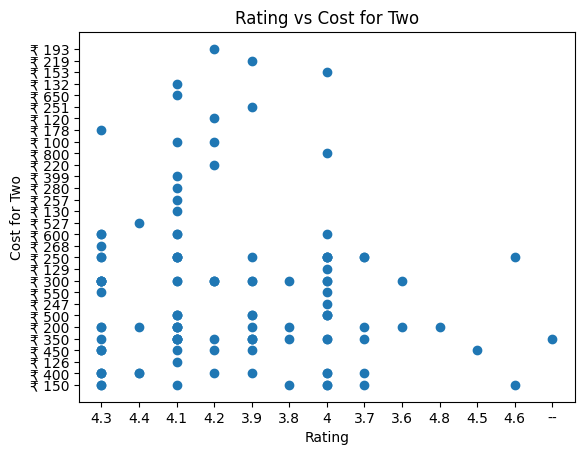

In [ ]:
# Analyze the relationship between attributes
plt.scatter(data['Rating'], data['Cost_for_Two'])
plt.xlabel('Rating')
plt.ylabel('Cost for Two')
plt.title('Rating vs Cost for Two')
plt.show()


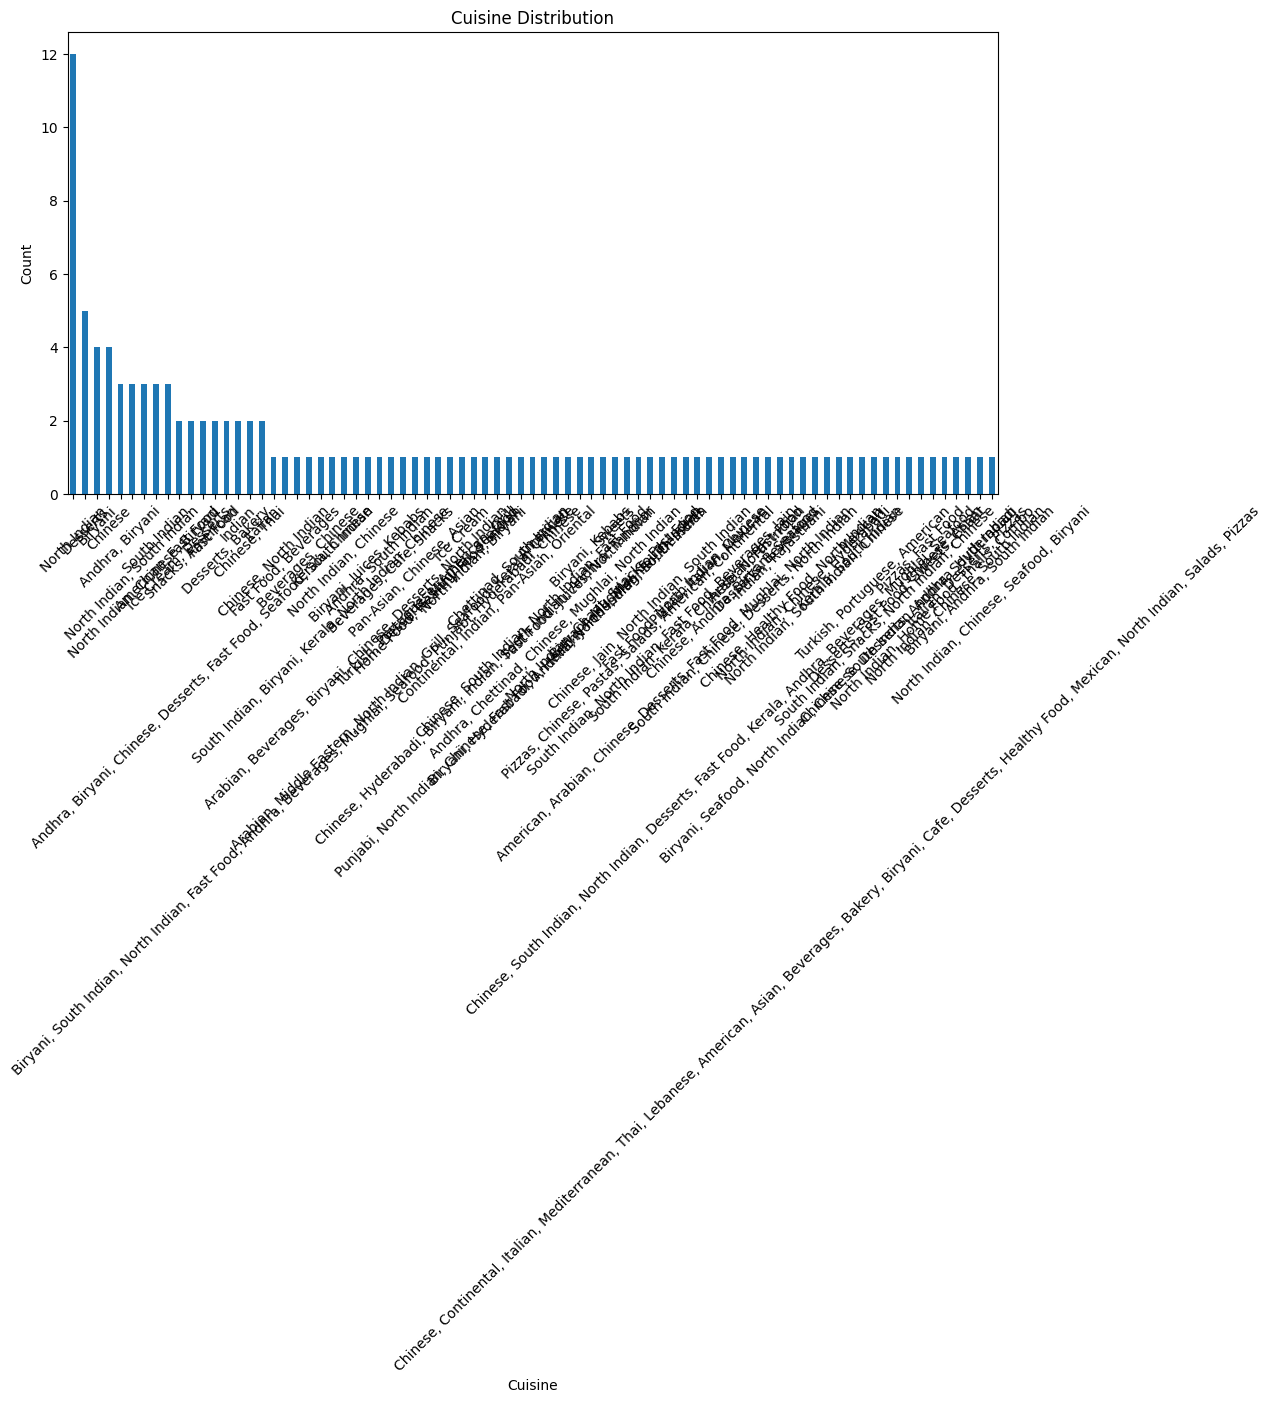

In [ ]:
#Cuisine Distribution: Visualize the distribution of different cuisines in the dataset using a bar chart.
cuisine_counts = data['Cuisine'].value_counts()

plt.figure(figsize=(12, 6))
cuisine_counts.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Cuisine Distribution')
plt.xticks(rotation=45)
plt.show()


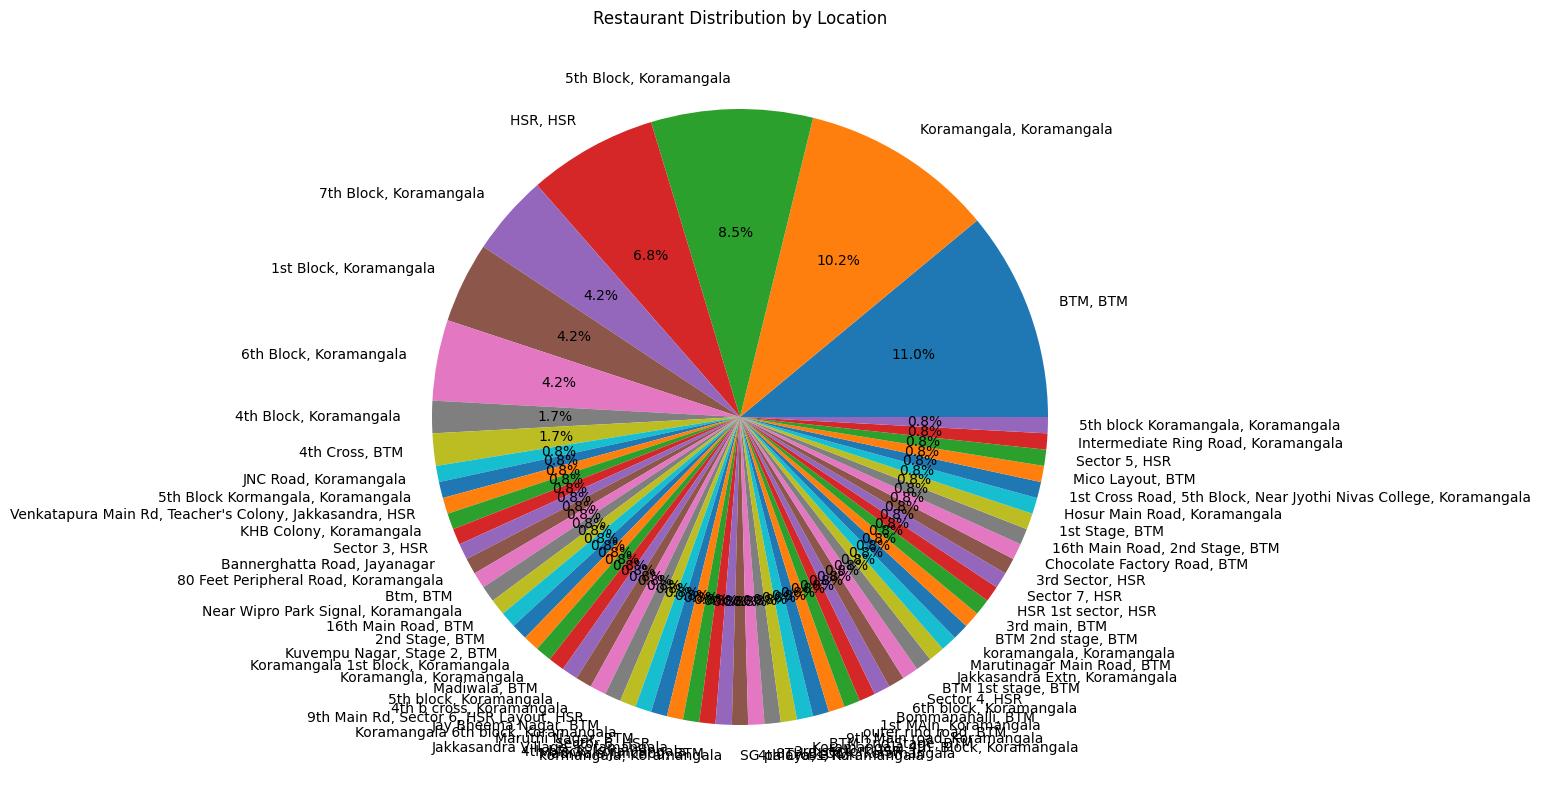

In [ ]:
#Location-wise Analysis: Analyze the distribution of restaurants in different locations using a pie chart.

location_counts = data['Location'].value_counts()

plt.figure(figsize=(10, 10))
location_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Restaurant Distribution by Location')
plt.ylabel('')
plt.show()


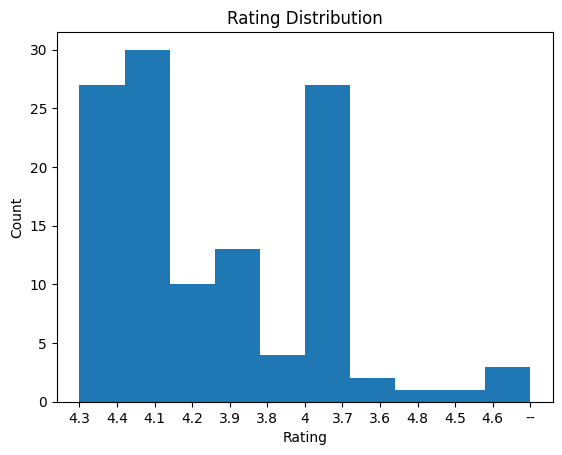

In [ ]:
#Rating Distribution: Plot a histogram to visualize the distribution of restaurant ratings.

plt.hist(data['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


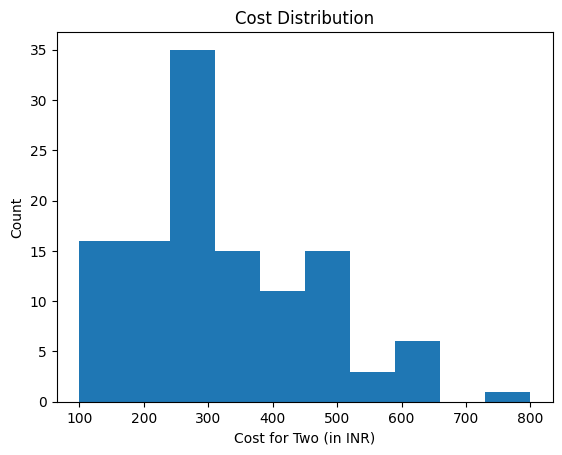

In [ ]:
#Cost Distribution: Visualize the distribution of the cost for two people using a histogram.
costs = data['Cost_for_Two'].str.extract(r'(\d+)').astype(float)

plt.hist(costs, bins=10)
plt.xlabel('Cost for Two (in INR)')
plt.ylabel('Count')
plt.title('Cost Distribution')
plt.show()


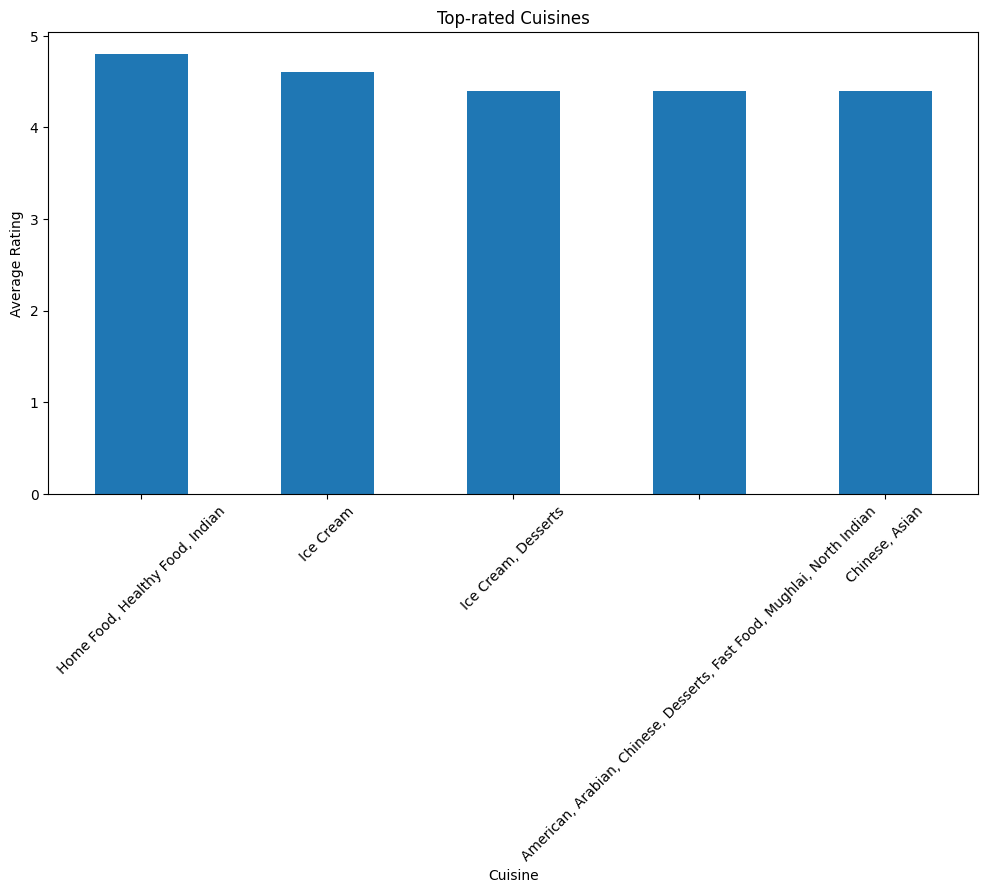

In [ ]:
#Top-rated Cuisines: Identify the top-rated cuisines by calculating the average rating for each cuisine and selecting the top ones.

# Convert the 'Rating' column to numeric
data['Rating'] = data['Rating'].str.extract(r'(\d+\.?\d*)').astype(float)

# Calculate average rating by cuisine
average_rating_by_cuisine = data.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)

top_rated_cuisines = average_rating_by_cuisine.head(5)

plt.figure(figsize=(12, 6))
top_rated_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top-rated Cuisines')
plt.xticks(rotation=45)
plt.show()


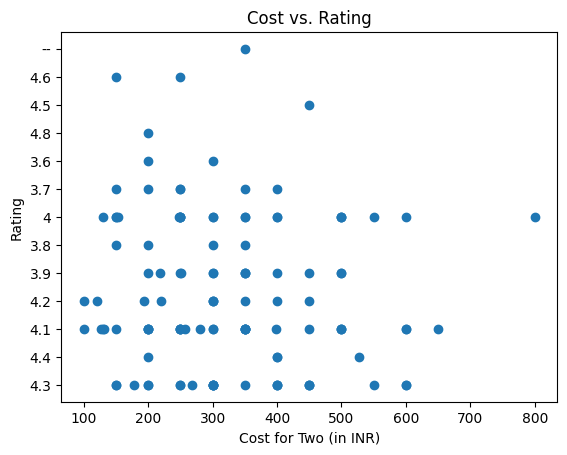

In [ ]:
#Cost vs. Rating: Analyze the relationship between the cost for two people and the restaurant rating using a scatter plot.
import re

data['Cost_for_Two'] = data['Cost_for_Two'].apply(lambda x: re.sub(r'[^\d.]', '', x)).astype(float)

plt.scatter(data['Cost_for_Two'], data['Rating'])
plt.xlabel('Cost for Two (in INR)')
plt.ylabel('Rating')
plt.title('Cost vs. Rating')
plt.show()


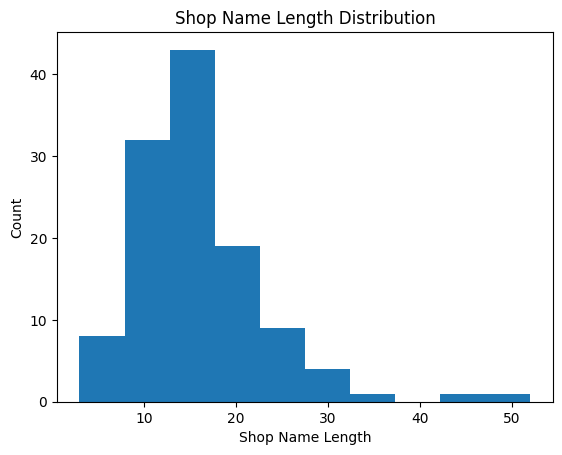

In [ ]:
#Shop Name Length: Examine the length distribution of the shop names by creating a histogram.
shop_name_lengths = data['Shop_Name'].str.len()

plt.hist(shop_name_lengths, bins=10)
plt.xlabel('Shop Name Length')
plt.ylabel('Count')
plt.title('Shop Name Length Distribution')
plt.show()


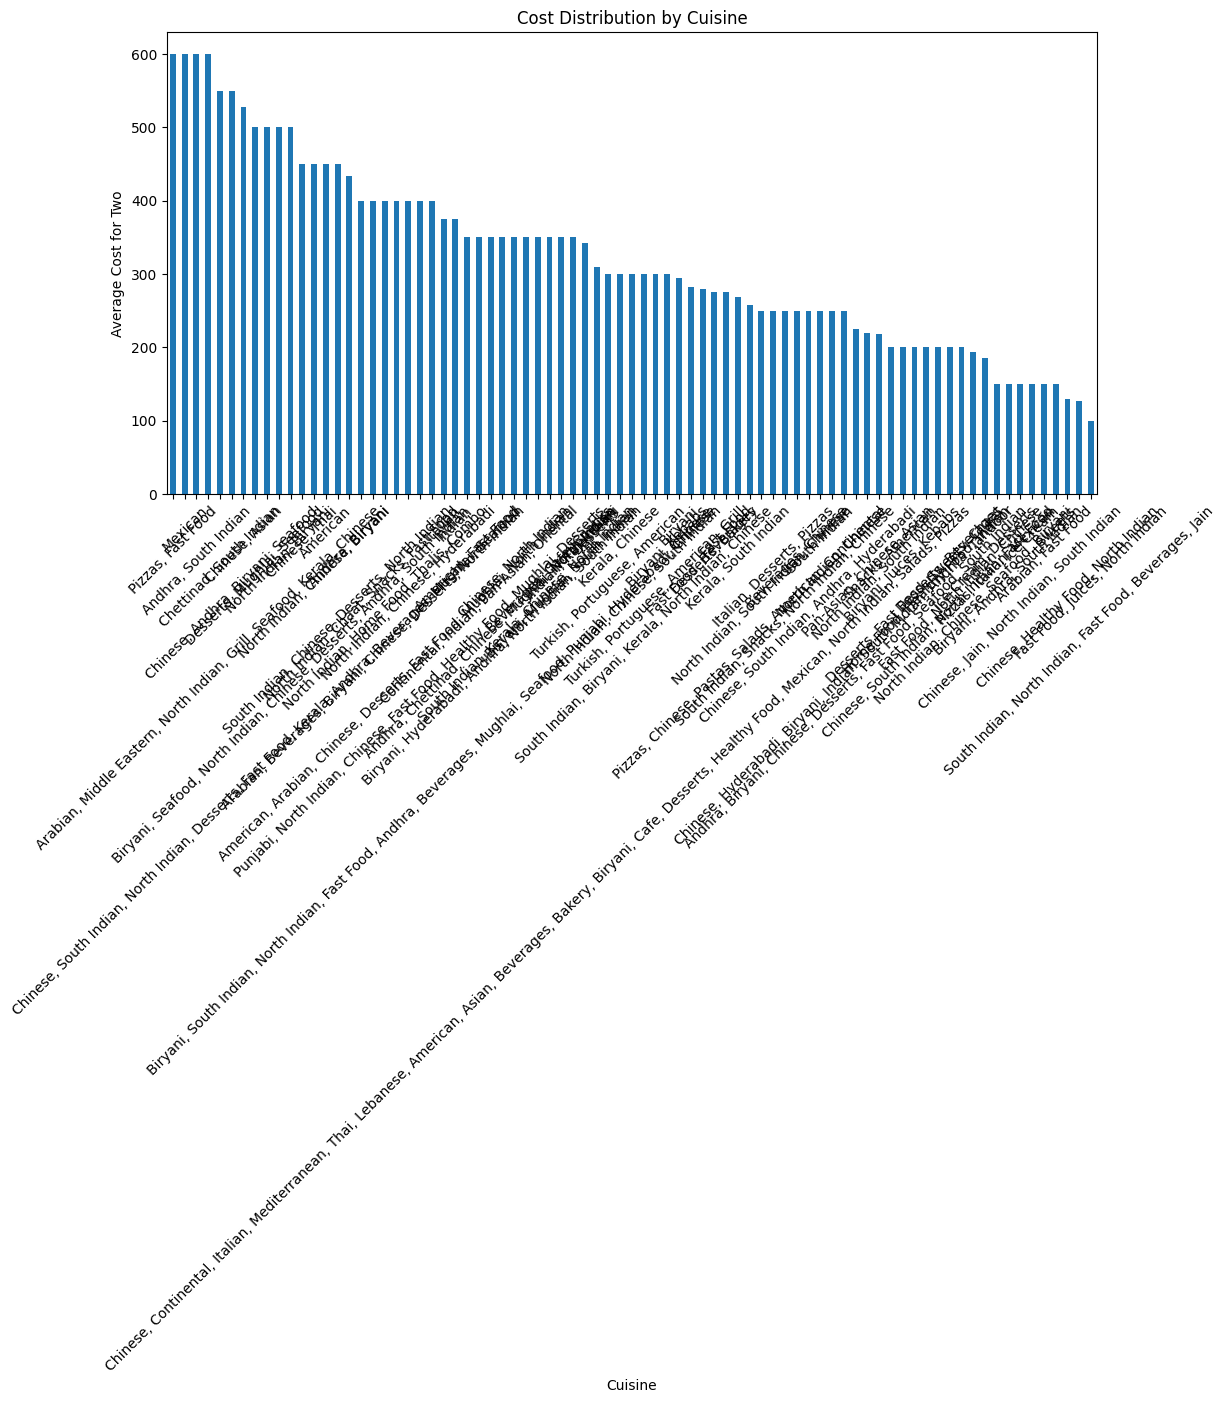

In [ ]:
#Cost Distribution by Cuisine: Visualize the distribution of the cost for two people across different cuisines using box plots.

import re

# Convert 'Cost_for_Two' column to string
data['Cost_for_Two'] = data['Cost_for_Two'].astype(str)

# Remove non-numeric characters from 'Cost_for_Two' column
data['Cost_for_Two'] = data['Cost_for_Two'].str.replace('[^\d.]', '', regex=True)

# Convert 'Cost_for_Two' column to numeric
data['Cost_for_Two'] = pd.to_numeric(data['Cost_for_Two'], errors='coerce')

# Calculate the distribution of costs by cuisine
cost_distribution_by_cuisine = data.groupby('Cuisine')['Cost_for_Two'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cost_distribution_by_cuisine.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost for Two')
plt.title('Cost Distribution by Cuisine')
plt.xticks(rotation=45)
plt.show()

